# Для решения задания буду использовать ```Распределение Лапласа```.

Подробнее о применяемом распредлении на Wiki: https://clck.ru/XWa8z 

и на Хабре: https://habr.com/ru/post/311092/

In [1]:
# Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Распределение Лапласа задается следующей формулой: $ L(x) = \frac{\alpha}{2}\ e^{-\alpha|x-\beta|}$, где $\alpha > 0$ - параметр масштаба, $-\infty < \beta < +\infty $ - параметр сдвига

Возьмем наше распределение со следующими параметрами: $\alpha = 2$ и $\beta = 5$

In [130]:
# Распределение Лапласа берем с следующими параметрами: 
alpha = 2.0
beta = 5.0
lapl_rv = sts.laplace(scale = alpha, loc = beta)

Сгенерируем из него выборку объёма 1000, построем гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины.

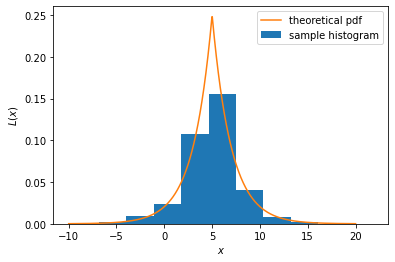

In [131]:
# выборка на 1000 элементов
sample = lapl_rv.rvs(1000)
# создаем выборку из 1000 элементов на интервале от -10 до 20
x = np.linspace(-10, 20, 1000)
# строим гистограмму выборки распределения Лапласа с заданными параметрами
pdf = lapl_rv.pdf(x)
plt.hist(sample, density=True, label='sample histogram')
# строим график теоретической плотности распределения Лапласа с заданными параметрами
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$L(x)$')
plt.xlabel('$x$')
plt.show()

Для нескольких значений n (например, 5, 10, 50) сгенерируем 1000 выборок объёма n и построем гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения, посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратиим внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию нашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения. 

Для распределения Лапласа, матожидание: $EX = \beta$, диcперсия: $ DX= \frac{2}{\alpha^2} $

Для выбранных нами параметров $\alpha = 2$ и $\beta = 5$, соответствено $EX = 5$, а $DX = \frac{2}{2^2} = 0.5 $
 
Cоответственно, $P = N(EX,\frac{DX}{n}) = N(\beta, \frac{2}{\alpha^2 n} = N(5, \frac{2}{2^2 n})$

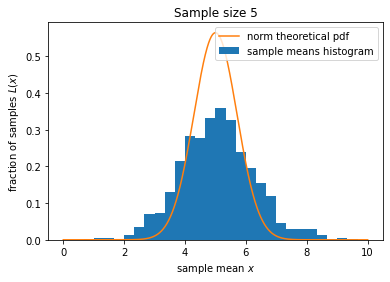

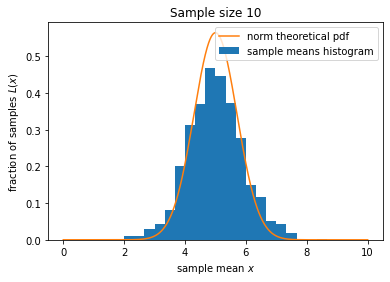

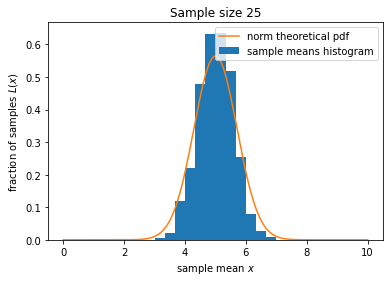

In [146]:
# Строим распределение выборочного среднего случайной величины распределения Лапласа для выборок с размерами n равными 5, 10, 25:
for n in [5, 10, 25]:
    # вычисляем среднее из 1000 выборок
    sample_means = []
    for rvn in range(1000):
        sample_means.append(lapl_rv.rvs(n).mean())
    # строим на графике
    plt.hist(sample_means, bins = 30, density=True, range=[0, 10],  label='sample means histogram')
    # вычисляем pdf плотность нормального распределения с данными параметрами
    norm_rv = sts.norm(beta, np.sqrt(2.0/((alpha**2.0) )))
    x = np.linspace(0, 10, 1000)
    pdf = norm_rv.pdf(x)
    # выстраиваем на графике
    plt.plot(x, pdf, label='norm theoretical pdf')
    plt.legend(loc='upper right')
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $L(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()



## Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

При увеличении размера выборки n, распределение средних значений начинает сходиться к 5, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет. При этом расчетное нормальное распределение более менее совпадает с гистограммой, согласно закону больших чисел.
